In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
from ridge import RidgeRegression

In [2]:
# Load the data
df = pd.read_csv('data.csv')

# Define the features (X) and the target (y)
X = df.drop('finishing_time', axis=1).values.reshape([-1, 1])
y = df['finishing_time'].values

# Split the data into train and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into validation and test sets (50% val, 50% test from temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [3]:
# Hyperparameter tuning
best_lambda = None
best_mse = np.inf
lambdas = [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 1000]
for lambda_ in lambdas:
    model = RidgeRegression(alpha=lambda_)
    model.fit(X_train, y_train)
    y_pred_val = model.predict(X_val)
    mse = model.MSE(y_pred_val, y_val)
    if mse < best_mse:
        best_mse = mse
        best_lambda = lambda_

# Train the model with the best lambda
best_model = RidgeRegression(alpha=best_lambda)
best_model.fit(X_train, y_train)

# Validate the model
y_pred_test = best_model.predict(X_test)
final_mse = best_model.MSE(y_pred_test, y_test)

print(f"Best lambda: {best_lambda}")
print(f"Validation MSE: {final_mse}")

Best lambda: 1000
Validation MSE: 0.04709983690184419


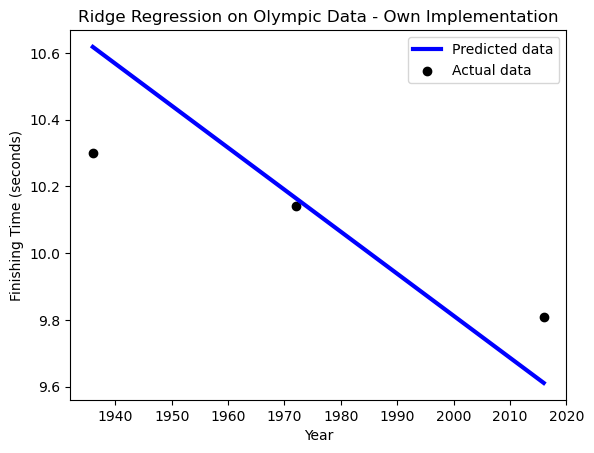

In [4]:
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_test, color='blue', linewidth=3, label='Predicted data')
plt.title('Ridge Regression on Olympic Data - Own Implementation')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Finishing Time (seconds)')
plt.show()

In [5]:
# Hyperparameter tuning
best_lambda_2 = None
best_mse_2 = np.inf
lambdas = [1e-15, 1e-10, 1e-8, 0.001, 0.01, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100, 1000]
for lambda_ in lambdas:
    model_2 = Ridge(alpha=lambda_)
    model_2.fit(X_train, y_train)
    y_pred_val_2 = model_2.predict(X_val)
    mse_2 = mean_squared_error(y_val, y_pred_val_2)
    if mse_2 < best_mse_2:
        best_mse_2 = mse_2
        best_lambda_2 = lambda_

# Train the model with the best lambda
best_model_2 = Ridge(alpha=best_lambda_2)
best_model_2.fit(X_train, y_train)

# Validate the model
y_pred_test_2 = best_model.predict(X_test)
final_mse_2 = mean_squared_error(y_test, y_pred_test_2)

print(f"Best lambda: {best_lambda_2}")
print(f"Validation MSE: {final_mse_2}")

Best lambda: 1000
Validation MSE: 0.04709983690184419


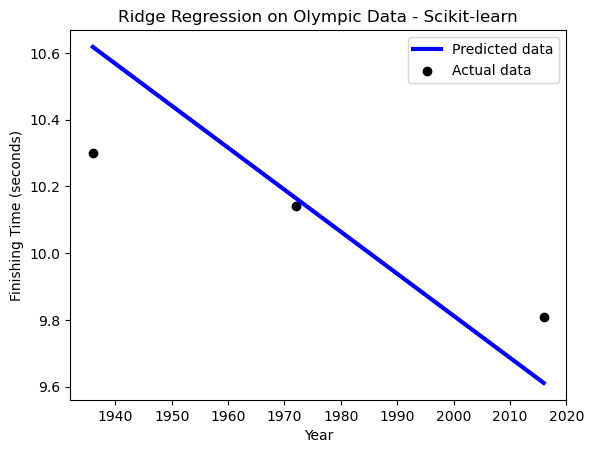

In [6]:
plt.scatter(X_test, y_test, color='black', label='Actual data')
plt.plot(X_test, y_pred_test_2, color='blue', linewidth=3, label='Predicted data')
plt.title('Ridge Regression on Olympic Data - Scikit-learn')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Finishing Time (seconds)')
plt.show()

In [7]:
# Load the California Housing dataset
housing = fetch_california_housing()

# Split the data into training and testing sets
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)

# Instantiate the Ridge Regression model with alpha = 0.1
ridge = RidgeRegression(alpha=0.1)

# Fit the model to the training data
ridge.fit(X_train_t, y_train_t)

# Make predictions on the testing data
y_pred_t = ridge.predict(X_test_t)

# Calculate the mean squared error of the predictions
mse_t = mean_squared_error(y_test_t, y_pred_t)

# Print the mean squared error
print("Mean Squared Error:", mse_t)

Mean Squared Error: 0.5305615027301317
